In [100]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [101]:
from Week1_Trapped_Ions.utils import hamming_distance

with open("task3_simulation_result_fine.txt"
          "", 'rb') as of:
    result = pickle.load(of)
    num_qubits = result['num_qubits']
    num_shots = result['num_shots']
    data = result['data']

In [102]:
#with 4 as x:
#for x in range(2**num_qubits):
x=7
step = [i/num_shots for i in range(num_shots)]
p_x = {D: sorted([data[D][i][x] for i in range(len(data[D]))]) for D in data}
cdf = dict()
for D in data:
    cdf_D = list()
    for th in step:
        cdf_D.append(len([v for v in p_x[D] if v < th])/len(p_x[D]))
    cdf.update({D:cdf_D})
pt_cdf = [1 - np.exp(-2**num_qubits * th) for th in step]

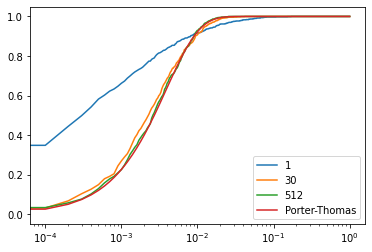

In [103]:
for D in p_x:
    plt.plot(step, cdf[D], label=str(D))
plt.plot(step, pt_cdf, label="Porter-Thomas")
plt.xscale("log")
plt.legend()